# Assignment S2

1.	HOW LOVELY!

You work at a local jewelry store. You’ve recently been promoted and the store owner asked you to better understand your customers. Using some sneaky magic (and the help of Environics!), you’ve managed to collect some useful features for a subset of your customers: age, income, spending score, and savings. Use these features to segment your customers and create customer personas.

2.	Perform a clustering analysis of the dataset. 
a.	Try different values of parameters (e.g., K for K-means).
b.	What do you think the best parameter values are? Why?
3.	Describe and interpret the clusters.
4.	How good are the results?

## 1.	Download the customer dataset: jewelry_customers.csv.

Import common packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
jewelry= pd.read_csv('jewelry_customers.csv')

### Extra: Perform some exploratory analysis

In [3]:
jewelry.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
#General info of dataset
jewelry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


- There are 505 instances. All of them are integers of floats
- The features are Age, income, spending score and savings

In [5]:
jewelry.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


<function matplotlib.pyplot.show(*args, **kw)>

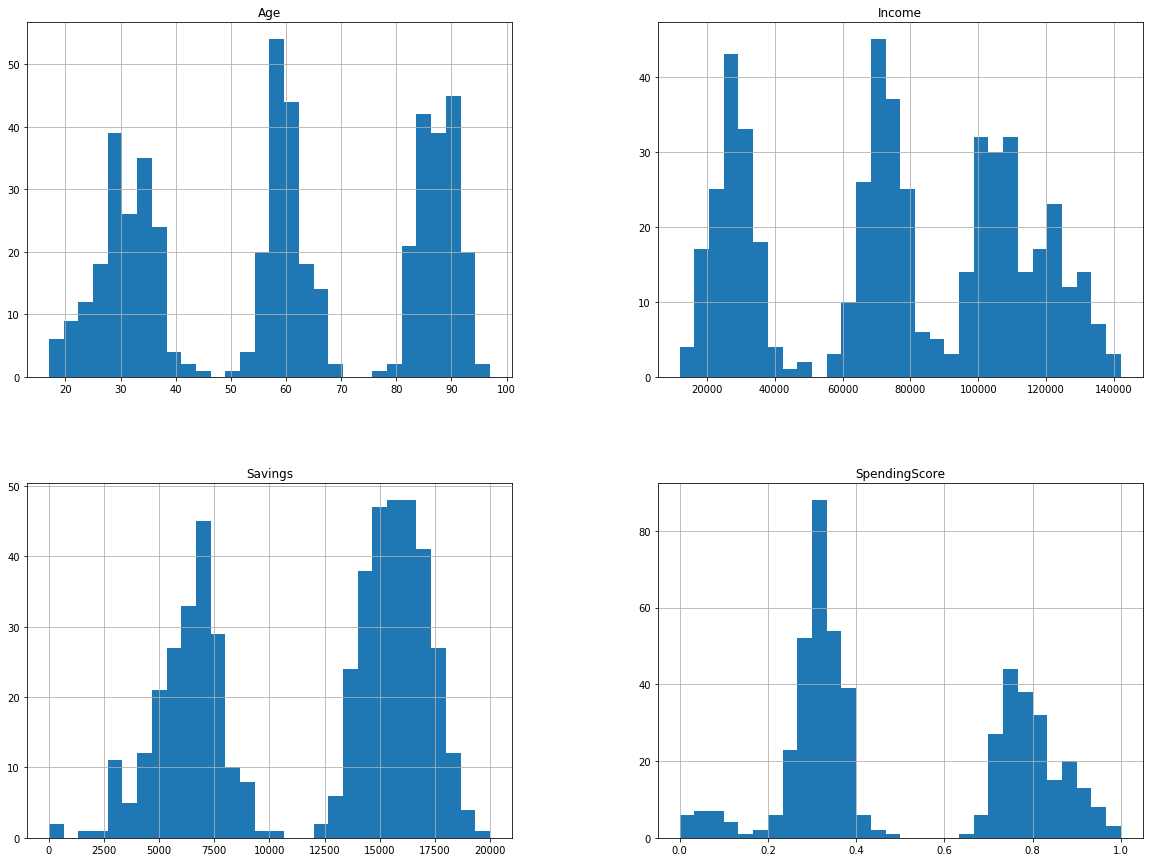

In [6]:
jewelry.hist(bins=30, figsize=(20,15))
plt.show

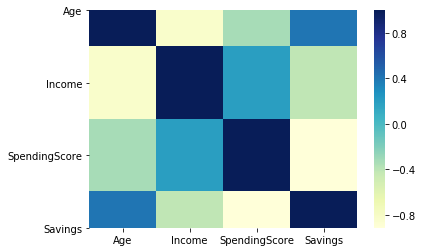

In [15]:
cor = jewelry.corr()
sns.heatmap(cor, cmap="YlGnBu")

### Extra: Scale the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
jewelry_scaled=scaler.fit_transform(jewelry)


C:\Users\eos_d\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eos_d\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
jewelry_scaled

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

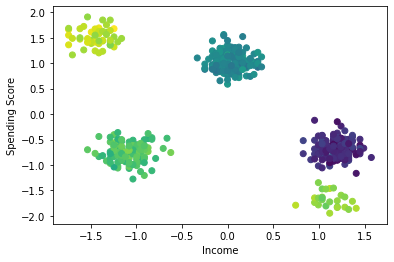

In [37]:
plt.scatter(jewelry_scaled[:,0],jewelry_scaled[:,2], c=jewelry_scaled[:,1])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

## 2. Perform a clustering analysis of the dataset

### K-means

In [18]:
from sklearn.cluster import KMeans
np.random.seed(42)
kmeans4 = KMeans(n_clusters=4)
JewelK4=kmeans4.fit(jewelry_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)